In [36]:
#A function to return an array given a file name that points to a text file containing numbers in a grid pattern
def read_file(file_name):
    #Open the file and then set the length of an array side based on how many lines long it is
    file = open(file_name, "r")
    n = len(file.readlines())
    #Have to close and open the file again to reset file pointer back to the top of the file
    file.close()
    file = open(file_name, "r")
    #Create an empty array and set its rows to be arrays
    arr = [[0 for x in range(n)] for y in range(n)]
    x=0
    for line in file:
        #Because the new line character \n is included, you have to replace it with "" and then split based on spaces
        arr[x] = line.replace("\n", "").split(" ")
        x += 1
    file.close()
    #Return the finished array
    return arr

In [37]:
import tkinter as tk
import random as r

class puzzleGrid:
    
    #A constructor for intializing a map.
    def __init__(self, master, inArray):
        #Assigning the 2D array's 1D size to a variable
        gridDim = len(inArray)
        #Generating a NxN grid based upon the input 2D array
        for i in range(gridDim):
            for j in range(gridDim):
                #Int values stored in the 2D array are converted to strings before display in the GUI grid.
                tk.Label(master, text = str(inArray[i][j]), padx = 10, pady = 10, relief = "sunken").grid(row=i, column=j)

#A function for generating a gradient value between provided 2D array dimensions, X-value, and Y-value.
#To be used to generate puzzles containing only legal moves.
def randomGradientGen(inDim, xVal, yVal):
    max_x = max(xVal, inDim - 1 - xVal)
    max_y = max(yVal, inDim - 1 - yVal)
    max_value = max(max_x, max_y)
    
    outInt = r.randint(1,max_value)
    
    return outInt
    
def arrayGen(inDim):

    #Our output array, Filling with random numbers with legal moves.
    newArr = [[randomGradientGen(inDim, x, y) for x in range(inDim)] for y in range(inDim)]
    #Setting goal to zero
    newArr[inDim-1][inDim-1] = 0
    return newArr

def show_GUI(arr):
    master = tk.Tk()
    master.resizable(width=False, height=False)
    newGrid = puzzleGrid(master, arr)
    master.mainloop()


In [38]:
#A function to return a matrix containing the number of steps required to reach each node in a given grid. If
#the node can't be reached, an 'X' appears there instead.
#The show_gui argument determines whether to show a GUI at the conclusion of the function or not.
def BFS(grid, show_gui):
    #Each grid is assumed to be n x n, so n is taken to be the length of one row of the grid
    n = len(grid[0])
    #This is the matrix that is returned. By default all nodes have 'X' in them. As they are visited these will be
    #replaced with the number of steps necessary to reach that node from the start.
    result_matrix = [['X' for x in range(n)] for y in range(n)]
    #The queue which stores the next grid location to check. Grid locations are stored as a number x, where
    #x // n is its row and x % n is its column.
    FIFO = []
    #The main loop of this function requires FIFO to already have values, so the
    #start point is done before the main loop
    result_matrix[0][0] = 0
    #grid_face_value stores what value is on the grid - it shows how many spaces
    #you can move from that face
    grid_face_value = grid[0][0]
    #current_depth_size keeps track of the remaining nodes to visit for each depth.
    #Once a depth no longer has any nodes to visit, the depth is incremented.
    current_depth_size = [0 for x in range(n ** 2)]
    #Because the start is always in the top-left, you can just add the nodes to the right and below
    #the start square.
    FIFO.append(grid_face_value)
    FIFO.append(grid_face_value * n)
    current_depth_size[0] = 2
    #Depth is set to 1 since only the start node takes 0 steps to reach.
    depth = 1
    #Repeat the loop until the BFS has exhausted all nodes.
    while (len(FIFO) > 0):
        #Pop the next instruction from the queue. This is an integer x which has x // n
        #as its row and x % n as its column
        next_instruction = FIFO.pop(0)
        #Set the node pointed to by the next instruction as requiring "depth" steps to reach
        result_matrix[next_instruction // n][next_instruction % n] = depth
        #Because you popped an instruction, decrement the counter for the lower depth
        current_depth_size[depth - 1] -= 1
        #grid_face_value is the value that's shown on the grid and represents how far you can move
        grid_face_value = grid[next_instruction //n][next_instruction % n]
            #Testing going to the right according to the value on the grid
        if ((next_instruction % n) + grid_face_value < n):
            #If the results matrix shows 'X' that means it's not visited yet
            if result_matrix[next_instruction // n][next_instruction % n + grid_face_value] == 'X':
                FIFO.append(next_instruction + grid_face_value)
                current_depth_size[depth] += 1
        #Testing going to the left according to the value on the grid
        if ((next_instruction % n) - grid_face_value >= 0):
            if result_matrix[next_instruction // n][next_instruction % n - grid_face_value] == 'X':
                FIFO.append(next_instruction - grid_face_value)
                current_depth_size[depth] += 1
        #Testing going downward according to the value on the grid
        if (next_instruction // n + grid_face_value < n):
            if result_matrix[(next_instruction // n) + grid_face_value][next_instruction % n] == 'X':
                FIFO.append(next_instruction + grid_face_value * n)
                current_depth_size[depth] += 1
        #Testing going upward according to the value on the grid
        if (next_instruction // n - grid_face_value >= 0):
            if result_matrix[(next_instruction // n) - grid_face_value][next_instruction % n] == 'X':
                FIFO.append(next_instruction - grid_face_value * n)
                current_depth_size[depth] += 1
        #Once you exhaust all steps from the lower depth, increment depth
        if (current_depth_size[depth - 1] == 0):
            depth += 1
    #Show a GUI if you want to
    if show_gui == 1:
        show_GUI(result_matrix)
    return result_matrix    

In [39]:
#This function computes the value function.
def compute_value(grid):
    #The result matrix is assumed to be n x n.
    result_matrix = BFS(grid, 0)
    n = len(result_matrix[0])
    value_function = 0
    #If the lower right corner (the goal) has an X in it, then the value function is -1 times
    #the number of X's in the result matrix (unvisited nodes).
    if (result_matrix[n-1][n-1] == 'X'):
        #Iterate through the entire result matrix
        for x in range(n):
            for y in range(n):
                if result_matrix[x][y] == 'X':
                    value_function -= 1
    #Otherwise, the value function is the number of moves needed to reach the goal
    else:
        value_function = result_matrix[n-1][n-1]
    return value_function

In [40]:
import random as r

#Need to cover for equal values. If the random value is equal it has to be re-randomzied. 
#Also, randomize x and y as well.

#A function to change a random tile in the given grid and return that changed grid
def change_random_tile(grid):
    n = len(grid[0])
    new_grid = [i[:] for i in grid]
    #Randomly select a tile to change. If it chooses the lower right tile, the goal tile,
    #then randomly choose another y value. Keep repeating if you keep getting the goal tile
    random_x = r.randint(0,n-1)
    random_y = r.randint(0,n-1)
    while random_x == n-1 and random_y == n-1:
        #ADDED RANDOMIZE X, BOTH VALUES WILL BE RANDOMIZED
        random_x = r.randint(0,n-1)
        random_y = r.randint(0,n-1)
    #Compute the max possible values considering only x or y separately. Then take the max of both
    #to get the max face value.
    max_x = max(random_x, n - 1 - random_x)
    max_y = max(random_y, n - 1 - random_y)
    max_face_value = max(max_x, max_y)
    
    #Modify the grid according to those random parameters
    #Including a clause to repeat the random repitition until the value is different from the original
    newVal = r.randint(1,max_face_value)
    while newVal == new_grid[random_x][random_y]:
        newVal = r.randint(1,max_face_value)
    new_grid[random_x][random_y] = newVal
    return new_grid

In [41]:
#A function to randomly change the puzzle to try and maximize the value function
#The show_gui argument determines whether to show a GUI at the conclusion of the function or not.
def hill_climbing(n, iterations, show_gui):
    grid = arrayGen(n)
    #This variable keeps track of what the best puzzle layout so far has been
    best_grid = [i[:] for i in grid]
    #This variable keeps track of the value function of the best puzzle layout so far
    best_value = compute_value(best_grid)
    #This variable keeps track of how many iterations it required to get to the best current value
    best_iteration_number = 0
    #All grids are assumed to be n x n, so this stores the length of a side
    n = len(grid[0])
    #Keep running the hill climbing algorithm until the required number of iterations has been done
    for x in range(iterations):
        #Modify the new grid by changing one tile
        new_grid = change_random_tile(best_grid)
        
        new_value = compute_value(new_grid)
        #If the new grid is better than the previous best grid, update all the bests
        if new_value >= best_value:
            best_grid = [i[:] for i in new_grid]
            best_value = new_value
            best_iteration_number = x
    
    #Show a GUI if you want to
    if show_gui == 1:
        print("Best iteration number is", best_iteration_number + 1)
        show_GUI(best_grid)
    return best_value

In [42]:
#A function to perform hill climbing with random restarts. The parameters are the size of the side of the grid,
#the number of iterations per hill climb, and how many times to restart.
#The show_gui argument determines whether to show a GUI at the conclusion of the function or not.
def random_restarts(n, iterations, restarts, show_gui):
    #Store the best grid, best value, and best restart number from the restarts
    best_grid = []
    best_value = 0
    best_restart = 0
    #Perform the hill climbming algorithm oncec for every restart
    for x in range(restarts):
        #For every restart, start with an entirely new grid
        grid = arrayGen(n)
        #Run the hill climbing algorithm on the randomly created new grid and calculate its value
        current_grid = hill_climbing(grid, iterations, 0)
        current_value = compute_value(current_grid)
        #If the hill climbing algorithm generated the best value, then update all the best variables
        if current_value >= best_value:
            best_value = current_value
            best_grid = [i[:] for i in current_grid]
            best_restart = x 
    
    #Show a GUI if you want to
    if show_gui == 1:
        print("Best restart number is", best_restart)
        show_GUI(best_grid)
    #Return the best grid
    return best_value
            

In [43]:
import random as r

#Parameters: inputGrid, number of iterations to perform, the probability 
#The show_gui argument determines whether to show a GUI at the conclusion of the function or not.
def random_walk(n, iterations, walkThresh, show_gui):
    grid = arrayGen(n)
    #This variable keeps track of what the best puzzle layout so far has been
    best_grid = [i[:] for i in grid]
    #This variable keeps track of the value function of the best puzzle layout so far
    best_value = compute_value(best_grid)
    #This variable keeps track of how many iterations it required to get to the best current value
    best_iteration_number = 0
    #All grids are assumed to be n x n, so this stores the length of a side
    n = len(grid[0])
    #Keep running the hill climbing algorithm until the required number of iterations has been done
    for x in range(iterations):
        #Modify the new grid by changing one tile
        new_grid = change_random_tile(best_grid)
        
        new_value = compute_value(new_grid)
        
        #NEW CODE - WOW
        #Generate a random value between 0.0 and 1.0
        walkProb = r.random()
        
        #The random probability threshhold is passed. Continue with Hill-climbing procedure
        if walkProb > walkThresh:
            #If the new grid is better than the previous best grid, update all the bests
            if new_value >= best_value:
                best_grid = [i[:] for i in new_grid]
                best_value = new_value
                best_iteration_number = x
        #The random probability threshhold was not passed. Walk down, accept the change regardless of its relative value.
        else:
            best_grid = [i[:] for i in new_grid]
            best_value = new_value
            best_iteration_number = x
        
    
    #Show a GUI if you want to
    if show_gui == 1:
        print("Best iteration number is", best_iteration_number + 1)
        show_GUI(best_grid)
    return best_value


In [44]:
import math as m

#A function to simulate annealing for the given grid.
#grid is the grid to run it on, iterations states how many times to run the algorithm ,
#start_temperature is the starting temperature, decay is the decay rate, and show_gui 
#shows the GUI for the best puzzle if set to 1
def simulated_annealing(n, iterations, start_temperature, decay, show_gui):
    grid = arrayGen(n)
    #This variable keeps track of what the best puzzle layout so far has been
    best_grid = [i[:] for i in grid]
    #This variable keeps track of the value function of the best puzzle layout so far
    best_value = compute_value(best_grid)
    #This variable keeps track of how many iterations it required to get to the best current value
    best_iteration_number = 0
    #All grids are assumed to be n x n, so this stores the length of a side
    n = len(grid[0])
    #This variable keeps track of the current temperature of the process
    temp = start_temperature
    #Keep running the hill climbing algorithm until the required number of iterations has been done
    for x in range(iterations):
        #Modify the new grid by changing one tile
        new_grid = change_random_tile(best_grid)
        
        new_value = compute_value(new_grid)
    
        #Calculate the probability of the change being accepted
        #Because this results in a huge number if temp is exceedingly small, change temp_prob to 1 if an overflow error occurs
        try:
            temp_prob = m.exp((new_value - best_value) / temp)
        except OverflowError:
            temp_prob = 1
        #Calculate a random value to compare to the temp_prob
        randInt = r.random()

        #The random probability threshhold is passed, accept it regardless of whether it's better
        if randInt < temp_prob:
            best_grid = [i[:] for i in new_grid]
            if new_value >= best_value:
                best_value = new_value
                best_iteration_number = x
        #The random probability threshhold was not passed, ignore the change
           
        #Decay the temperature according to the decay rate
        temp = temp * decay
        
    #Show a GUI if you want to
    if show_gui == 1:
        print("Best iteration number is", best_iteration_number + 1)
        show_GUI(best_grid)
    return best_value

In [45]:

#A function to cross over between grids
#The input must be a flattened 1-d representation of a grid, and the position states where to switch over
def cross_over(grids, position):
    new_grids = [i[:] for i in grids]
    cross_over_portions = []
    #Delete the parts of the arrays after the crossover position after storing them
    for x in range(len(new_grids)):
        cross_over_portions.append(new_grids[x][position:])
        del new_grids[x][position:]
    #Add the crossover portions to the next grid in the array
    for x in range(len(cross_over_portions) - 1):
         new_grids[x + 1].extend(cross_over_portions[x])
    #Loop over to the beginning with the crossing over
    new_grids[0].extend(cross_over_portions[len(cross_over_portions) - 1])
    return new_grids

In [46]:
#A function to change a 2-d array into a 1-d array
def flatten_array(inArray):
    outArray=[]
    
    for x in range(len(inArray)):
        outArray.extend(inArray[x])
        
    return outArray

In [47]:
#A function to change a 1-d array into a 2-d array with sides of length n
def unflatten_array(array, n):
    new_array = [[0 for x in range(n)] for y in range(n)]
    for x in range(n):
        for y in range(n):
            new_array[x][y] = array[x * n + y]
    return new_array

In [48]:
#A function to assign probabilities to select each grid
def selection (fitnessArr):
    #Initializing relevant data structures.
    selectionVals = []
    
    #Initializing relevant variables.
    idealValue = len(fitnessArr[0][0][0])**2
    fitnessTotal = 0.0
    
    fitness = []
    
    #Iterating through all fitness values in 4D fitness array.
    for x in range(len(fitnessArr)):
        #Calculating Difference from ideal, reciprocating it, and keeping a running total
        try:
            fitness.append(1/(idealValue-fitnessArr[x][1]))
            fitnessTotal += fitness[x]
        #Exception handling in the event we randomly produce the perfect puzzle. All other selection values become zero.
        #The position of the best puzzle is maintained and utilized
        except ZeroDivisionError:
            uber_array = [0 for x in range(len(fitnessArr))]
            uber_array[x] = 1
            return uber_array
        
    
    #Dividing all values in the grid Population by the fitness total to generate a selection probability-
    # -and appending them, in order, to the output array holding selection probabilities.
    for x in range(len(fitness)):
        selectionVals.append(fitness[x]/fitnessTotal)
        
    return selectionVals


In [49]:
#A genetic algorithm that takes the size of the sides of the grid, the number of iterations,
#the crossover position, the population size, and whether to show the gui as inputs
def genetic_algorithm(n, iterations, crossover_position, population_size, show_gui):
    #Store the best grid and value
    best_grid = []
    best_value = 0
    #The population will constantly be changing
    population = []
    #Initialize the population with random grids
    for x in range(population_size):
        new_grid = arrayGen(n)
        population.append(new_grid)
    #Repeat the genetic algorithm the number of times of iterations
    for x in range(iterations):
        #The fitness array holds the grids and their values
        fitness = []
        for y in range(len(population)):
            fitness.append([population[y], compute_value(population[y])])
        #Probabilities holds the probability of each grid being selected to survive into the next population
        probabilities = selection(fitness)
        #The population thresholds measure which numbers the random number generator must fall between to
        #select that grid to survive to the next population
        probability_thresholds = [0]
        for p in range(len(probabilities)):
            probability_thresholds.append(probability_thresholds[p] + probabilities[p])
        #A new population is created and randomly selected from the previous, weighted by their values
        new_population = []
        for s in range(len(population)):
            rand_int = r.random()
            for p in range(len(probability_thresholds) - 1):
                if rand_int > probability_thresholds[p] and rand_int < probability_thresholds[p + 1]:
                    new_population.append(population[p])
        #Transform the population into flat forms for crossing over
        flat_population = []
        for m in range(len(new_population)):
            flat_population.append(flatten_array(new_population[m]))
        #If the crossover position is negative, then choose a random crossing over point for every iteration
        if crossover_position > 0:
            flat_population = cross_over(flat_population, crossover_position)
        else:
            random_position = r.randint(1, (n * n) - 2)
            flat_population = cross_over(flat_population, random_position)
        #Unflatten the population and randomly mutate it
        new_population = []
        for m in range(len(flat_population)):
            new_population.append(unflatten_array(flat_population[m], n))
            new_population[m] = change_random_tile(new_population[m])
        #Check to see if a new best grid has arisen from the process
        for x in range(len(new_population)):
            value = compute_value(new_population[m])
            if value >= best_value:
                best_grid = [i[:] for i in new_population[m]]
                best_value = value
        population = [i for i in new_population]
    #If show GUi is on, show a GUI of the best grid and print the best value
    if show_gui == 1:
        show_GUI(best_grid)
    return best_value

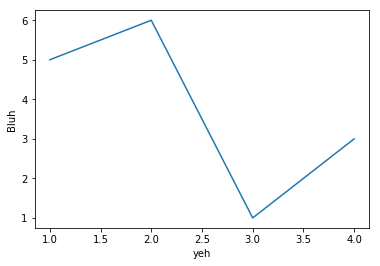

In [50]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [5, 6, 1, 3])
plt.ylabel("Bluh")
plt.xlabel("yeh")
plt.show()

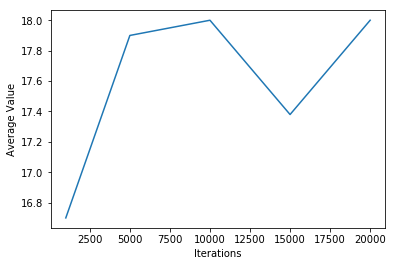

In [51]:
iterations = [1000, 5000, 10000, 15000, 20000]

x_axis = []
y_axis = []

for x in range(len(iterations)):
    hill_climbing_sum = 0
    for y in range(50):
        hill_climbing_sum += hill_climbing(5, iterations[x], 0)

    hill_climbing_average = hill_climbing_sum / 50

    x_axis.append(iterations[x])
    y_axis.append(hill_climbing_average)

plt.plot(x_axis, y_axis)
plt.ylabel("Average Value")
plt.xlabel("Iterations")
plt.show()
